<h4>Importing Libraries</h4>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h4>Import the dataset</h4>

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Male", "Female"])

dataset = pd.read_csv("Mall_Customers.csv")

dataset = dataset.apply(LabelEncoder().fit_transform)

x = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, -1].values

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


<h4>using the elbow method to find the optimal number of cluster</h4>

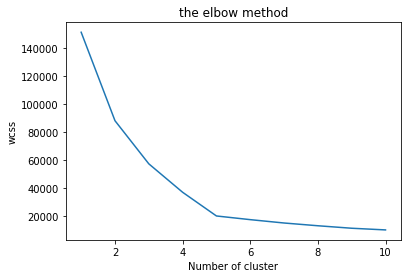

In [37]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("Number of cluster")
plt.ylabel('wcss')
plt.show()

<h3>Training the K-Means model on dataset</h3>

In [42]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

<h4>Visualizing The cluster</h4>

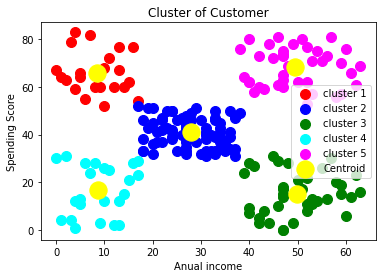

In [51]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label="cluster 1")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='blue', label="cluster 2")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='green', label="cluster 3")
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=100, c='cyan', label="cluster 4")
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=100, c='magenta', label="cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label="Centroid")

plt.title("Cluster of Customer")
plt.xlabel("Anual income")
plt.ylabel('Spending Score')
plt.legend()
plt.show()